In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-data-set/file_out2.csv
/kaggle/input/retail-data-set/file_out.csv


# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">Financial Prediction in Retail with Fast Fourier Transform</p>

In this project, I will be performing financial income prediction / forecasting project with using the time series approach on the customer's records from a retail industry firm's database. Financial prediction is the practice of time series approach with single or multiple time series input. I will also add more notebooks about financial prediction with different algorithms and approaches. One notebook already published for the seasonality test ( https://www.kaggle.com/code/shedai/sales-volume-seasonality ) with a single time series approach, more notebooks are coming. 

- Single Time Series Approach: Sales volume is one of the mostly predicted feature in the time series. In this approach, project aims to create a time series from daily, weekly or monthly sales data. Most of the time, there is only one time series with 2 features : time (dates) and sales volume.
- Multiple Parameter Time Series Approach: This type of approaches have multiple inputs, where all inputs are temporal (time dependent series) or we do feature engineering to create multiple inputs for the prediction model.

For this notebook, we will be using the Fast Fourier Transform (FFT) technique from DARTS library. ( you can check the wikipedia link for further details : <a href = "https://en.wikipedia.org/wiki/Fast_Fourier_transform">https://en.wikipedia.org/wiki/Fast_Fourier_transform</a>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
      
* [3. Creating Time Series](#3)
    
* [4. Data Visualization and Analysis](#4)
    
* [5. Prediction / Forecasting with FFT](#5)
    
* [6. Real Life Time Forecasting](#6)
    
* [7. Conclusion](#7)
    
* [8. END](#8)

<a class="anchor"  id="1"></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;"> 1. Importing Libraries</p>  

In [2]:
pip install darts --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


DARTS is a very handy library for the time series analysis, includes most of the modern time series approaches. You can also try Facebook Prophet, ARIMA, Exponential Smooting etc. from the library. You can access its github link : <a href ="https://unit8co.github.io/darts/">https://unit8co.github.io/darts/</a>

In [3]:
from darts import TimeSeries
from darts.models import FFT
from darts.metrics import mae
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

<a id='#2'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">2. Loading Data</p>  
    
Now, we can load the data set and convert it to time series. The conversion requires the grouping dataset with the sum of sales for each day and type conversion to datetime format in pandas. 

In [4]:

df = pd.read_csv('/kaggle/input/retail-data-set/file_out2.csv')
df = df.groupby('Date').sum()
df['Date'] = df.index
df = df[['Date','TotalSales']]

df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')


<a id='#3'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">3. Creating Time Series</p>  

    We can now convert the pandas dataframe to DARTS time series data type. 

In [5]:

#df['Date'] = df['Date'].asfreq('W')
series = TimeSeries.from_dataframe(df,
                                   time_col = 'Date',  
                                   value_cols = 'TotalSales',
                                   fill_missing_dates=True, freq='D')



<a id='#4'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">4. Data Visualization</p>
    
DARTS library has its own visualization and splitting functions. We can split the time series with 90% for training and 10% for testing purposes. Also, we can use the plot() function for the visualization of train and test sets. 


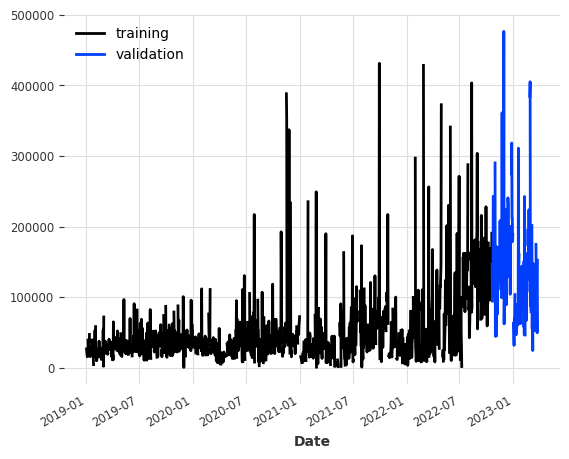

In [6]:
train, val = series.split_before(0.9)
train.plot(label="training")
val.plot(label="validation")

<a id='#5'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">5. Prediction and Forecasting with FFT</p>  
Now we will try to use the forecasting with FFT. FFT gets multiple parameters and one of the crucial one is the trend analysis. Furthermore we can use the mean absolute error calculation for the evaluation of the time series from DARTS library again. Finally we visualize the time series. 

MAE: 70020.62140570444


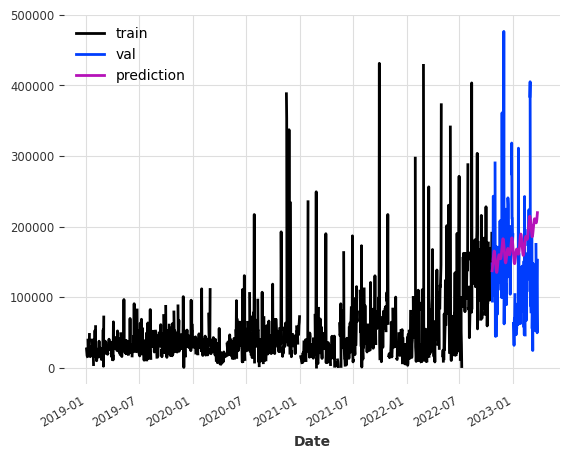

In [7]:
model = FFT(trend="poly")
model.fit(train)
pred_val = model.predict(len(val))
print("MAE:", mae(pred_val, val))
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")


<a id='#6'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">6. Real Life Forecasting</p>  
**What about future?** We can also use the whole data set for training and predict the future with 10% of data set date range again. 

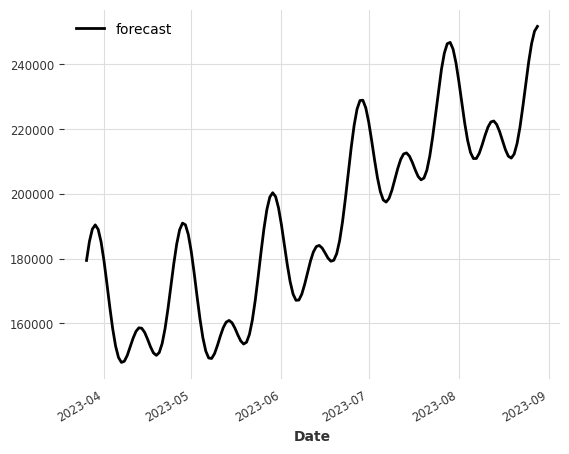

In [8]:
model.fit(series)
pred_val = model.predict(len(val))
pred_val.plot(label="forecast")

<a id='#7'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">7. Conclusion</p> 
We have started with a sales data in retail industry and created a financial times series and extracted total sales volume per date. Date parameter is in daily frequency so we have created a time series and converted the datatime format for the DARTS library. Although there are many different time series libraries, for this notebook I have utilized the DARTS library and called the FFT training with polynomial trend. Finally we have the predictions for the test and future forecasts. Hope you enjoyed the notebook and dont forget to upvote if you liked it.

<a id='#8'></a>
# <p style="background-color:#BDBDBD;font-family:newtimeroman;color:#D3463F;font-size:150%;text-align:center;border-radius:10px 10px;">8. END</p>
Hello, my name is Sadi Evren SEKER and this is a notebook just for fun. You can reach me by <a href = "https://www.sadievrenseker.com">https://www.sadievrenseker.com</a> (my homepage) or my udemy courses ( <a href="https://www.udemy.com/user/sadievrenseker/">https://www.udemy.com/user/sadievrenseker/</a> ) or my youtube channel ( <a href ="https://www.youtube.com/@dataconcepts">https://www.youtube.com/@dataconcepts </a> ) or my linkedin profile ( <a href = "https://www.linkedin.com/in/sadiseker/"> https://www.linkedin.com/in/sadiseker/</a>) , bests.